# T-Tests

$H_0$ : $\mu_A = \mu_B$ (Null-hypothesis : Results come from same distribution)

$H_{alt}$ : $\mu_A \neq \mu_B$ (Alternative-hypothesis : Results doesn't come from same distribution)

T-test : Create t-statistic, calculate p-value, see if p > 0.05 or not (same distribution or not)

In [2]:
import numpy as np
# https://www.statisticshowto.com/probability-and-statistics/t-test/#:~:text=Paired%20Samples%20T%20Test%20By%20hand
def paired_t_test(X_,Y_):
    diff = X_ - Y_

    squared_diff = np.square(diff)

    print(squared_diff)
    
    sum_squared_diff = np.sum(squared_diff)
    print(sum_squared_diff)
    sum_diff = np.sum(diff)
    print(sum_diff)
    n = len(X_)

    denom = (sum_diff/n)
    nom = sum_squared_diff - (sum_diff*sum_diff)/2
    print(nom)
    nom = nom / ((n-1) * n)
    t =  denom / np.sqrt(nom)

    return t

def t_test(X_,Y_):
    
    sum_x = np.sum(X_)
    sum_y = np.sum(Y_)

    squared_sum_x = np.square(sum_x)
    squared_sum_y = np.square(sum_y)

    mean_x = np.mean(X_)
    mean_y = np.mean(Y_)

    square_x = np.sum([np.square(x) for x in X_])
    square_y = np.sum([np.square(y) for y in Y_])

    denom = mean_x - mean_y

    nom = (((square_x - squared_sum_x/len(X_)) + (square_y - squared_sum_y/len(Y_))) / (len(X_) + len(Y_) - 2)) * (1/len(X_) + 1/len(Y_))

    t = denom/np.sqrt(nom)
    return t

# https://medium.com/analytics-vidhya/using-the-corrected-paired-students-t-test-for-comparing-the-performance-of-machine-learning-dc6529eaa97f
def ttest_mod(RFC_score, SVM_score):
    #Compute the difference between the results
    diff = [y - x for y, x in zip(RFC_score, SVM_score)]
    #Comopute the mean of differences
    d_bar = np.mean(diff)
    #compute the variance of differences
    sigma2 = np.var(diff,ddof=1)
    #compute the number of data points used for training 
    n1 = len(RFC_score)
    #compute the number of data points used for testing 
    n2 = len(RFC_score)
    #compute the total number of data points
    n = len(RFC_score)
    #compute the modified variance
    sigma2_mod = sigma2 * (1/n + n2/n1)
    #compute the t_static
    t_static =  d_bar / np.sqrt(sigma2_mod)
    from scipy.stats import t
    #Compute p-value and plot the results 
    Pvalue = ((1 - t.cdf(t_static, n-1))*2)
    return t_static, Pvalue

In [3]:
import pandas as pd

# Load performances from csv
df1 = pd.read_csv('Metric_scores/NRMS_SEED_42_HIST_10',header=None)
df2 = pd.read_csv('Metric_scores/NRMS_SEED_42_HIST_100',header=None)

df1.columns = ["IDX","AUC","Acc"]
df2.columns = ["IDX","AUC","Acc"]

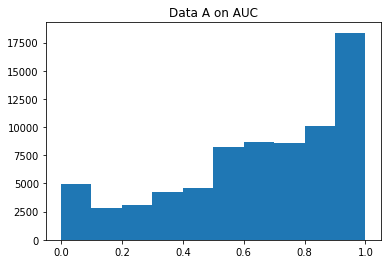

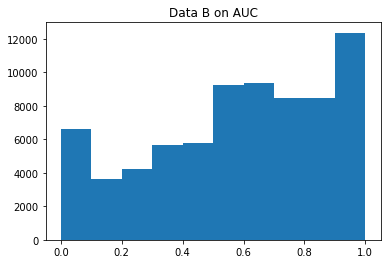

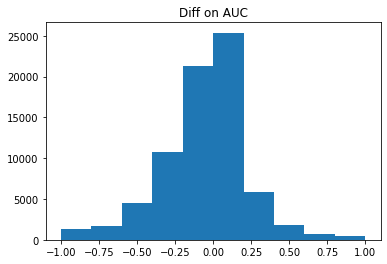

In [4]:
# Plot data
import matplotlib.pyplot as plt

plt.hist(df1['AUC'])
plt.title("Data A on AUC")
plt.show()

plt.hist(df2['AUC'])
plt.title("Data B on AUC")
plt.show()

plt.hist(df2['AUC'] - df1['AUC'])
plt.title("Diff on AUC")
plt.show()

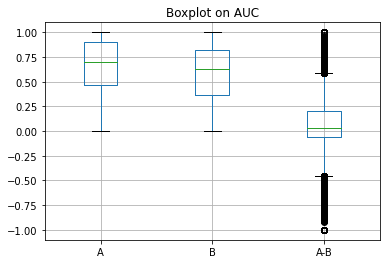

In [5]:
results = pd.DataFrame()
results['A'] = df1['AUC']
results['B'] = df2['AUC']
results['A-B'] = (df1['AUC'] - df2['AUC'])
results.boxplot()
plt.title("Boxplot on AUC")
plt.show()

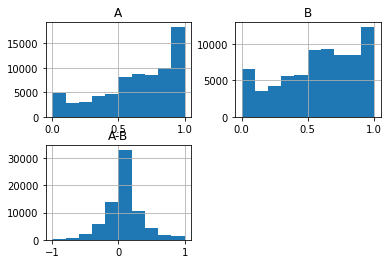

In [6]:
results.hist()
plt.show()

In [7]:
from scipy.stats import normaltest

# Check if data is gaussian
print(normaltest(df2['AUC']))
print(normaltest(df1['AUC']))
print(normaltest(df2['Acc']))
print(normaltest(df1['Acc']))


NormaltestResult(statistic=9304.961277981336, pvalue=0.0)
NormaltestResult(statistic=6194.137620154172, pvalue=0.0)
NormaltestResult(statistic=61434.66106616378, pvalue=0.0)
NormaltestResult(statistic=64674.48658250194, pvalue=0.0)


In [8]:
# Test significance for non-Gaussian 
from scipy.stats import ks_2samp

v,p = ks_2samp(results['A'],results['B'])
print(f"Statistic : {v}, Pval : {p}")
if p > 0.05:
    print("Probably same distribution")
else:
    print("Probably different distribution -> Results are significant")

Statistic : 0.10604394858639743, Pval : 0.0
Probably different distribution -> Results are significant


In [9]:
# Check significance with modifidied students t-test

tval = ttest_mod(df1['AUC'],df2['AUC'])

print(f"T,P : {tval}")

T,P : (0.23896451478526917, 0.8111337634319189)


In [10]:
# Check significance with scipy ttest-related

from scipy.stats import ttest_rel
from scipy.stats import t

tscore, pvalue = ttest_rel(df1['AUC'], df2['AUC'])
print("t Statistic: ", tscore)

# P value is the are of the two sided curve
print("P Value: ", pvalue)

t Statistic:  64.86379120512633
P Value:  0.0


In [11]:
df1['AUC'].head()

0    0.625000
1    0.666667
2    0.935780
3    0.975610
4    0.692308
Name: AUC, dtype: float64